<h1>Logistic Regression (Classification)</h1>

So far we investigated the regression problem in which the output ($y$) was a continuous number. However, there is another types of problem in machine learning called **Classification** in which the output of the model is a discrete number (label)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
np.random.seed(24)
x = np.random.randint(30, high=150, size=100, dtype=int)
y = 1 * x ** 2 + 5 * x + 15
noise = np.random.normal(0, 400, size=100)
y_noisy = np.clip((y + noise).astype(int), 200, None)
dataset = np.array([x, y_noisy]).T
dataset_df = pd.DataFrame(dataset, columns=["area", "price"])
dataset_df.head(7)

,area,price
0,64,4373
1,33,371
2,94,9914
3,117,14150
4,47,2271
5,47,3362
6,31,236


Text(0, 0.5, 'Price ($)')

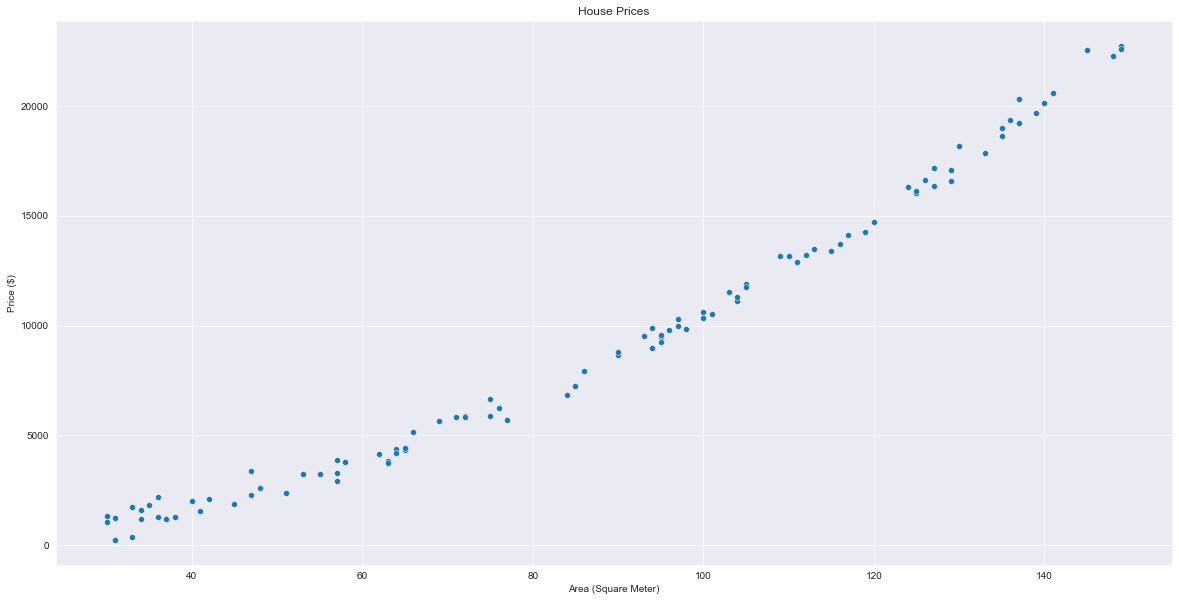

In [3]:
plt.figure(figsize=(20,10))
plt.title("House Prices")
sns.scatterplot(data=dataset_df,x="area", y="price")
plt.xlabel("Area (Square Meter)")
plt.ylabel("Price ($)")

In [4]:
x_class = np.random.randint(30, high=150, size=100, dtype=int)
y_class = np.zeros_like(x_class)
y_class[x_class < 60] = 1
y_class[(x_class > 60) & (x_class < 100)] = 0
y_class[x_class > 100] = 2
noise = np.zeros_like(x_class)
noise[np.random.uniform(size=x_class.shape[0])>0.8] = 1
y_class_noisy = y_class
y_class_noisy[noise==1] = np.random.randint(low=0, high=3,size=y_class_noisy[noise==1].shape[0])

dataset_class = np.array([x_class, y_class_noisy]).T
dataset_class_df = pd.DataFrame(dataset_class, columns=["feature", "label"])
dataset_class_df.head(7)

,feature,label
0,40,1
1,147,1
2,147,2
3,139,0
4,99,0
5,39,1
6,41,1


Text(0, 0.5, 'label')

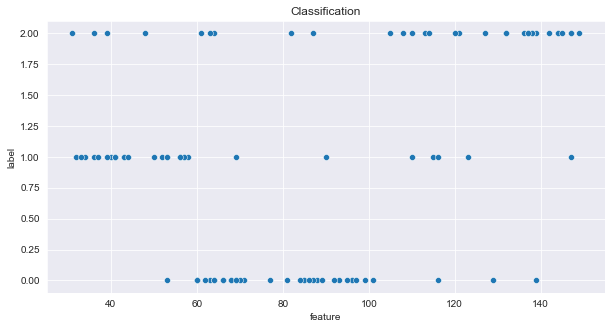

In [5]:
plt.figure(figsize=(10,5))
plt.title("Classification")
sns.scatterplot(data=dataset_class_df,x="feature", y="label")
plt.xlabel("feature")
plt.ylabel("label")

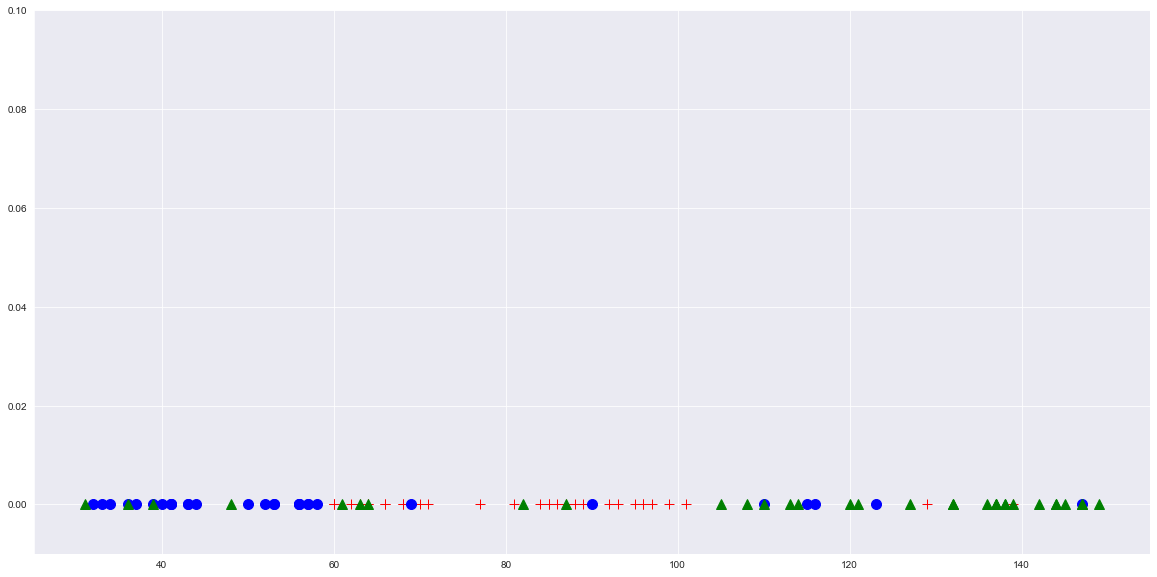

In [6]:
x_0 = x_class[y_class_noisy==0]
x_1 = x_class[y_class_noisy==1]
x_2 = x_class[y_class_noisy==2]
plt.figure(figsize=(20,10))
plt.plot(x_0, np.zeros_like(x_0), "r+", markersize=10)
plt.plot(x_1, np.zeros_like(x_1), "bo", markersize=10)
plt.plot(x_2, np.zeros_like(x_2), "g^", markersize=10)
plt.ylim(-0.01,.1)
plt.show()

<img src="images/classification.png" alt="classification" width="400" height="400">

<h2>Examples of Classification Problems</h2>

<h3>1. Spam Email Classification</h3>

<img src="images/spam_email.png" alt="spam email" width="400" height="400">

<h3>2. E-Commerce Comments Sentiment Analysis</h3>

<img src="images/comment_sentiment_analysis.jpg" alt="comment sentiment analysis" width="400" height="400">

<h3>3. Covid Detection Using X-Rays</h3>

<img src="images/covid_detection.jpeg" alt="covid detection" width="400" height="400">

<h2>Salmon Vs Sea Bass</h2>

A fish packing plant wants to automate
the process of sorting incoming Fish on a
conveyor according to species using optical sensing

<img src="images/seabass_vs_salmon.png" alt="salmon vs seabass" width="400" height="400">

We set up a camera and take some
sample images to extract features that
could help us to distinguish between the
two species of fish like:
1. Lenght
2. Lightness

we gathered a dataset as follows:

In [7]:
dataset = pd.read_csv("salmon_vs_seabass.csv")
dataset.head()

,length,lightness,category
0,31,1909,1
1,51,1972,1
2,34,1780,0
3,29,1606,0
4,48,1669,0


In [8]:
salmon = dataset.loc[dataset["category"] == 0][["length","lightness"]].values
seabass = dataset.loc[dataset["category"] == 1][["length","lightness"]].values

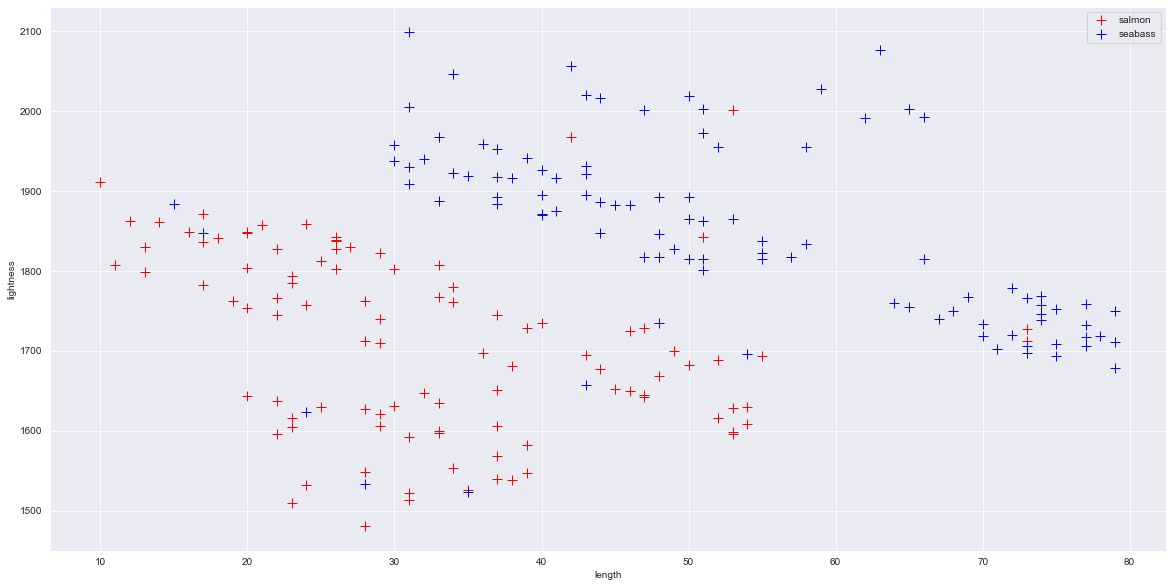

In [9]:
plt.figure(figsize=(20,10))
plt.plot(salmon[:, 0], salmon[:, 1], "r+", markersize=10, label="salmon")
plt.plot(seabass[:, 0], seabass[:, 1], "b+", markersize=10, label="seabass")
plt.xlabel("length")
plt.ylabel("lightness")
plt.legend()

Based on visualization it seems we can use a linear seperator to decide whether the data belongs to Salmon or Seabass category

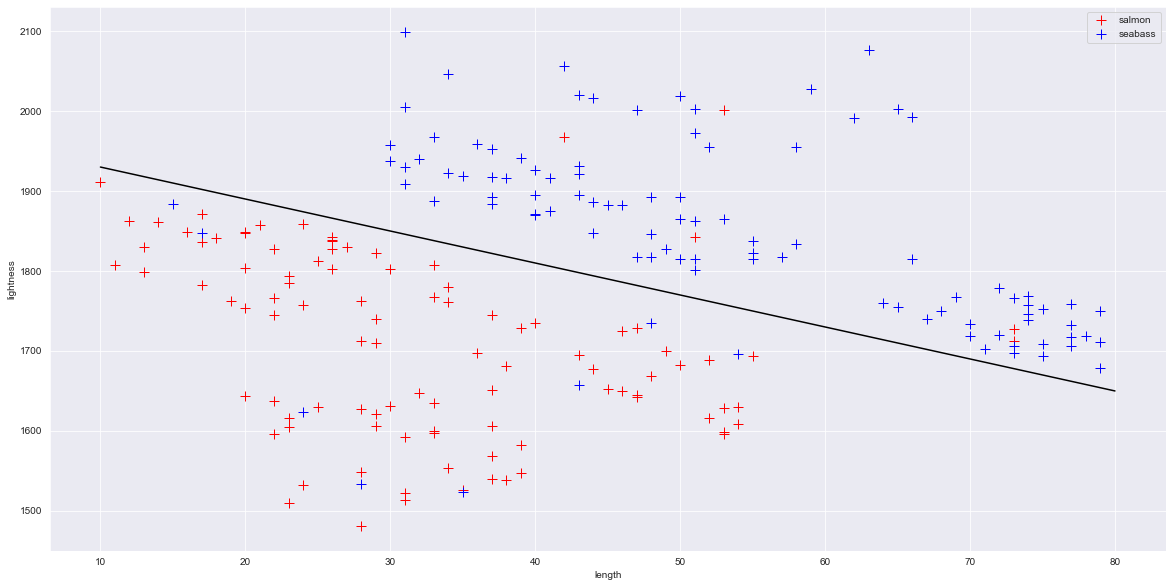

In [10]:
x_plot = np.linspace(10, 80, 1000).reshape(-1,1)
y_plot = -4 * x_plot + 1970
plt.figure(figsize=(20,10))
plt.plot(salmon[:, 0], salmon[:, 1], "r+", markersize=10, label="salmon")
plt.plot(seabass[:, 0], seabass[:, 1], "b+", markersize=10, label="seabass")
plt.plot(x_plot, y_plot,"k")
plt.xlabel("length")
plt.ylabel("lightness")
plt.legend()

<h3>But how the model works?</h3>

1. A sample datapoint goes into the model

<img src="images/classifier_pipeline.png" alt="salmon vs seabass" width="400" height="400">

2. A linaer Function is Computed for the data:
$$
y_{linear} = w_1x_1 + w_2x_2 + w_3
$$

3. A non-linear funciton (threshold) is computed for linearity output
$$
y_{pred} = f(y_{linear})
$$

<img src="images/classifier_blocks.png" alt="salmon vs seabass" width="400" height="400">

however the **Step Function** is not appropriate for gradient-base optimization techniques so it is better to use a smooth function:

<img src="images/unit_step.png" alt="unit step" width="400" height="400">

the below function is a smooth version of unit step function calls **Logistic Function** or **Sigmoid Function**

<img src="images/sigmoid_function.png" alt="sigmoid" width="400" height="400">

$$
\sigma (x) = \frac{1}{1 + e^{-x}}
$$

Using this function gives the problem a probabilistic view. In other words, instead of predicting whether a datapoint belongs to class A or B, we compute the **probability** that this data belongs to class A.

<h3>Logistic Regression Model</h3>

So in conclusion given a **feature vector** $X$ the mathematical function that map this input to logistic regression output is as follows:

$$
y_{pred} = \frac{1}{1 + e^{-(w_1x_1 + w_2x_2 + ... + w_nx_n + w_{n+1})}}
$$

<h3>Logistic Loss</h3>

In Logistic Regression we can not use the **MSE** loss function since the loss function would not be **Convex** either.

<img src="images/convex.png" alt="convex function" width="400" height="400">

<img src="images/non_convex.png" alt="non-convex function" width="400" height="400">

So we use following loss function (**Cross Entropy Loss**):

$$
Cost(y_{pred}, y_{true}) = \left\{
\begin{array}{ll}
      -\log (y_{pred}) & y_{true}=1 \\
      -\log (1 - y_{pred}) & y_{true}=0 \\
\end{array} 
\right.
$$

#### Simpified version

$$
J(w_1, w_2, ..., w_n, w_{n+1}) = \frac{1}{N}\sum_{i=1}^{N} Cost(y_{pred}^{(i)}, y_{true}^{(i)}) 
$$

$$
J(w_1, w_2, ..., w_n, w_{n+1}) = -\frac{1}{N}\sum_{i=1}^{N} y_{true}^{(i)}\log (y_{pred}^{(i)}) + (1 - y_{true}^{(i)})\log (1 - y_{pred}^{(i)})
$$

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [12]:
model = LogisticRegression()
X = dataset[["length", "lightness"]].values
y = dataset[["category"]].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
model.fit(X_train, y_train)

C:\Users\Soheil\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [13]:
w_1, w_2 = model.coef_.squeeze()
w_3 = model.intercept_[0]

In [14]:
w_2 / w_1

0.14582036793498626

In [15]:
model.score(X_test, y_test) * 100

94.0

To Evaluate the model or use it in inference mode first you should set a threshold for the output of the model to decide whether the data belongs to class A or class B

$$
if \hspace{0.3cm} y_{pred} = \frac{1}{1 + e^{-(w_1x_1 + w_2x_2 + ... + w_nx_n + w_{n+1})}} > threshold \rightarrow Class_{pred} = 1 \\
if \hspace{0.3cm} y_{pred} = \frac{1}{1 + e^{-(w_1x_1 + w_2x_2 + ... + w_nx_n + w_{n+1})}} < threshold \rightarrow Class_{pred} = 0
$$

## Evaluation of  Classification Models

after you trained your classifiar successfully, it's time to evaluate the performance of the model that is how good the model is in predicting the outcome.
Lets consider another familiar example to demonstration of this concept:

<img src="images/covid_testing.jpg" alt="covid testing" width="300" height="300">

Consider, we have a machine learning model classifying people as COVID positive and negative.

Based on the model's outcome and the actual result there will be one of the four following states:

1. **True Positive (TP)** : When you predict an observation belongs to a class and it actually does belong to that class. In this case, a person who is classified as COVID positive and is actually positive.
2. **True Negative (TN)** :  When you predict an observation does not belong to a class and it actually does not belong to that class. In this case, a person who is classified as not COVID positive (negative) and is actually not COVID positive (negative).
3. **False Positive (FP)** : When you predict an observation belongs to a class and it actually does not belong to that class. In this case, a person who is classified as COVID positive and is actually not COVID positive (negative).
4. **False Negative (FN)** : When you predict an observation does not belong to a class and it actually does belong to that class. In this case, a person who is classified as not COVID positive (negative) and is actually COVID positive.

$$
\downarrow threshold \rightarrow \uparrow True Positive \rightarrow \uparrow False Positive \rightarrow \downarrow True Negative \rightarrow \downarrow False Negative
$$

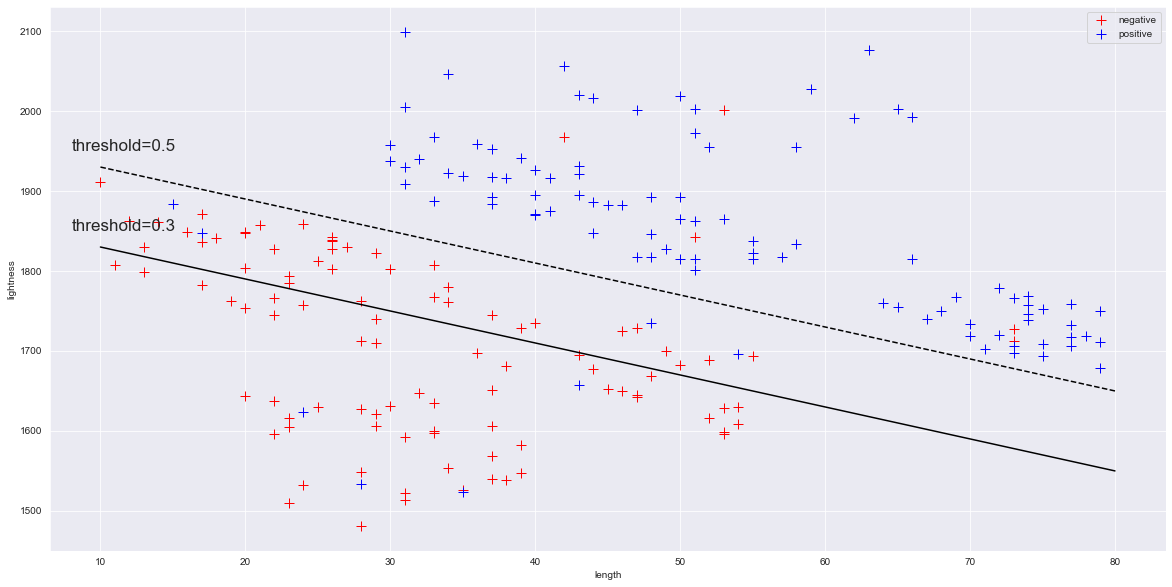

In [44]:
x_plot = np.linspace(10, 80, 1000).reshape(-1,1)
y_plot = -4 * x_plot + 1970
plt.figure(figsize=(20,10))
plt.plot(salmon[:, 0], salmon[:, 1], "r+", markersize=10, label="negative")
plt.plot(seabass[:, 0], seabass[:, 1], "b+", markersize=10, label="positive")
plt.plot(x_plot, y_plot,"k--")
plt.plot(x_plot, y_plot - 100,"k")
plt.annotate('threshold=0.3', xy=(8, 1850), size=17)
plt.annotate('threshold=0.5', xy=(8, 1950), size=17)
plt.xlabel("length")
plt.ylabel("lightness")
plt.legend()

$$
\uparrow threshold \rightarrow \downarrow True Positive \rightarrow \downarrow False Positive \rightarrow \uparrow True Negative \rightarrow \uparrow False Negative
$$

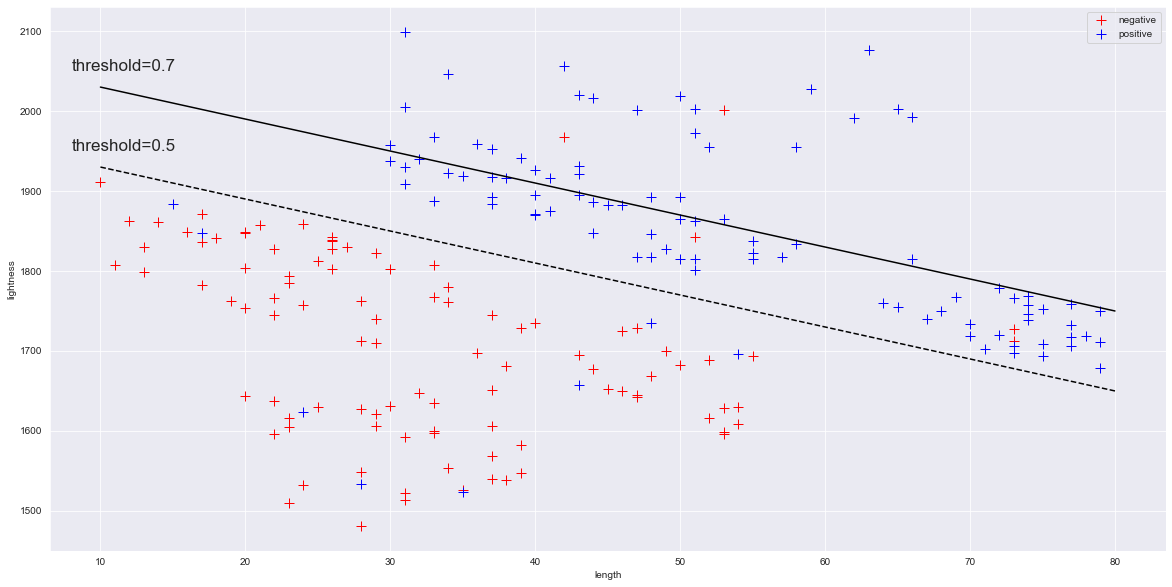

In [43]:
x_plot = np.linspace(10, 80, 1000).reshape(-1,1)
y_plot = -4 * x_plot + 1970
plt.figure(figsize=(20,10))
plt.plot(salmon[:, 0], salmon[:, 1], "r+", markersize=10, label="negative")
plt.plot(seabass[:, 0], seabass[:, 1], "b+", markersize=10, label="positive")
plt.plot(x_plot, y_plot,"k--")
plt.plot(x_plot, y_plot + 100,"k")
plt.annotate('threshold=0.7', xy=(8, 2050), size=17)
plt.annotate('threshold=0.5', xy=(8, 1950), size=17)
plt.xlabel("length")
plt.ylabel("lightness")
plt.legend()

### Confusion Matrix

For better visualization of the performance of a model, these four outcomes are plotted on a confusion matrix.

<img src="images/confusion_matrix.png" alt="confusion matrix" width="300" height="300">

### Accuracy

One of the intuitive performance metrix is to maximize the rate of True Positive and True Negative.
Accuracy is one metric which gives the fraction of predictions our model got right. Formally, accuracy has the following definition:

Accuracy = Number of correct predictions / Total number of predictions.

$$
Accuracy = \frac{TP + TN}{TP + FP + TN + FN} = \frac{TP + TN}{Total Data}
$$

#### Is It The Best Choice?

Now, let’s consider 50,000 passengers get tested per day on an average. Out of which, 10 are actually COVID positive.

One of the easy ways to increase accuracy is to classify every person as COVID negative. So our confusion matrix looks like:

<img src="images/accuracy_confusion.png" alt="confusion matrix" width="300" height="300">

Accuracy for this case will be:

Accuracy = 49,990/50,000 = 0.9998 or 99.98%

Although the accuracy is very impressive, this model does not solve our problem of finding COVID positive tests.
False labeling of actually positive cases is extremely expensive in this scenario. Accuracy in this context is a terrible measure because its easy to get extremely good accuracy but that’s not what we are interested in.

### Recall (Sensitivity or True positive rate)

Recall gives the fraction you correctly identified as positive out of all positives.

$$
Recall = \frac{TP}{TP + FN} = \frac{TP}{Total  Positives}
$$

For the previous data distribution the Recall would be:

Recall = 0/10 = 0

So, in this context, Recall is a good measure. It says that the terrible strategy of identifying every passenger as COVID negative leads to zero recall. 

Consider another scenario of labeling every person as COVID positive. Everybody walks into the lab and the model just labels them as positive. Labeling every person as positive is bad in terms of the amount of cost that needs to be spent in actually investigating each one.

The confusion matrix will look like:

<img src="images/accuracy_confusion.png" alt="confusion matrix" width="300" height="300">

Recall for this case would be:

Recall =  10/(10+0) = 1

That’s a huge problem. So concluding, it turns out that accuracy was a bad idea because labeling everyone as negative can increase the accuracy but hoping Recall will be a good measure in this context but then realized that labeling everyone as positive will increase recall as well.

So recall independently is not a good measure.

### Precision

Precision gives the fraction of correctly identified as positive out of all predicted as positives.

$$
Precision = \frac{TP}{TP + FP} = \frac{TP}{TotalPredictedPositive}
$$

Considering our second bad strategy of labeling every passenger as positive, the precision would be:

Precision =  10 / (10 + 49990) = 0.0002

This clarifies that recall alone is not a good measure, we need to consider precision value.

Considering another Case that is labeling persons with the highest probability of having COVID. Let’s say we got only one such passenger. The confusion matrix in this case will be:



<img src="images/precision_confusion.png" alt="confusion matrix" width="300" height="300">

Precision = 1/ (1 + 0) = 1

Recall = 1 / (1 + 9) = 0.1

### Precision-Recall Tradeoff

$$
\downarrow threshold \rightarrow \uparrow Recall \rightarrow \downarrow Precision
$$

$$
\uparrow threshold \rightarrow \downarrow Recall \rightarrow \uparrow Precision
$$

So in general for most classifiers, there is going to be a trade-off between recall and precision as you vary the probability threshold.

<img src="images/precision_recall_curve.png" alt="confusion matrix" width="300" height="300">

### F1 Score

If you need to compare different models with different precision-recall value, It is often convenient to combine precision and recall into a single metric. 
We need a metric that considers both recall and precision to compute the performance.

the F1 Score is defined as the harmonic mean of the model’s precision and recall.

$$
F1Score = 2 \frac{Precision \times Recall}{Precision + Recall}
$$

### ROC/AUC Curve

Up until now we learned that different threshold values lead to different confusion matrix. So it is better to have a visualization tool to find the optimum threshold value

For each possible threshold, the ROC curve plots the False positive rate versus the true positive rate.

False Positive Rate: Fraction of negative instances that are incorrectly classified as positive.

True Positive Rate: Fraction of positive instances that are correctly predicted as positive.

<img src="images/roc.png" alt="confusion matrix" width="300" height="300">

From the above graph, it can be seen that the true positive rate increases at a higher rate but suddenly at a certain threshold, the TPR starts to taper off. For every increase in TPR, we have to pay a cost, the cost of an increase in FPR. At the initial stage, the TPR increase is higher than FPR

So, we can select the threshold for which the TPR is high and FPR is low.

For different models, we will have a different ROC curve. Now, how to compare different models? From the above plot, it is clear that the curve is in the upper triangle, the good the model is.  One way to compare classifiers is to measure the area under the curve for ROC.

<img src="images/auc.png" alt="confusion matrix" width="300" height="300">